In [1]:
from nptdms import TdmsFile
from sklearn import preprocessing 
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# load in data
tdms_file = TdmsFile("Automatik_Werkzeugbruchsicherung_2.tdms")
#list out the groups
groups = tdms_file.groups()  
groups

['BOOL', 'INT', 'DINT', 'UINT', 'TIME']

**explain** We now consider the situation where we have a number of time series and  wish toexplore the relations between them. We rst look at the relation between crosscorrelation and multivariate autoregressive models and then at the cross-spectral density and coherence.


In [4]:
'''
Step 1: kick out the "all zero", "all one" value
this Step is essential for selection meaningful selection

'''
df = tdms_file.object('DINT').as_dataframe()
num_attr = df.columns.size
dropall = []
for i in range(0,num_attr):
    index = df.columns[i]
    if(all(df[index]==0) or all(df[index]==1)):
        dropall.append(df.columns[i])
df.drop(dropall, axis = 1, inplace= True)

In [4]:

df_INT = pd.read_csv("AW2_INT.csv")
df_UINT = pd.read_csv("AW2_UINT.csv")
df_BOOL = pd.read_csv("AW2_BOOL.csv")
df_DINT = pd.read_csv("AW2_DINT.csv")

In [28]:
df_DINT['timestamp']

0        1970-01-01 00:00:00.002347+00:00
1        1970-01-01 00:00:00.002868+00:00
2        1970-01-01 00:00:00.003390+00:00
3        1970-01-01 00:00:00.003902+00:00
4        1970-01-01 00:00:00.004402+00:00
5        1970-01-01 00:00:00.004894+00:00
6        1970-01-01 00:00:00.005382+00:00
7        1970-01-01 00:00:00.005868+00:00
8        1970-01-01 00:00:00.006354+00:00
9        1970-01-01 00:00:00.006862+00:00
10       1970-01-01 00:00:00.007396+00:00
11       1970-01-01 00:00:00.007928+00:00
12       1970-01-01 00:00:00.008448+00:00
13       1970-01-01 00:00:00.008953+00:00
14       1970-01-01 00:00:00.009449+00:00
15       1970-01-01 00:00:00.009936+00:00
16       1970-01-01 00:00:00.010418+00:00
17       1970-01-01 00:00:00.010903+00:00
18       1970-01-01 00:00:00.011391+00:00
19       1970-01-01 00:00:00.011878+00:00
20       1970-01-01 00:00:00.012362+00:00
21       1970-01-01 00:00:00.012848+00:00
22       1970-01-01 00:00:00.013358+00:00
23       1970-01-01 00:00:00.01389

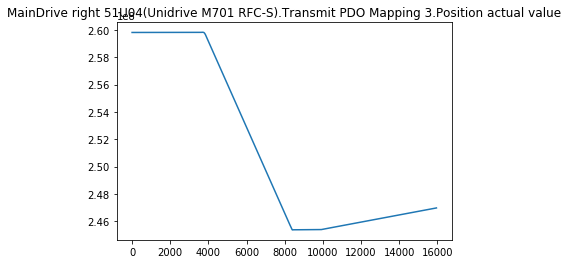

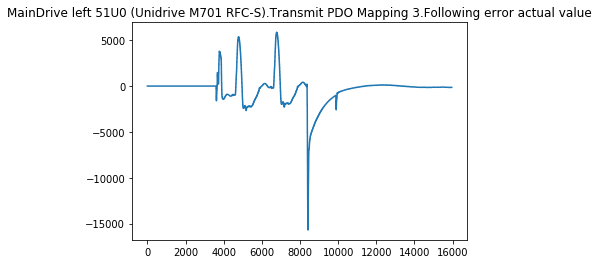

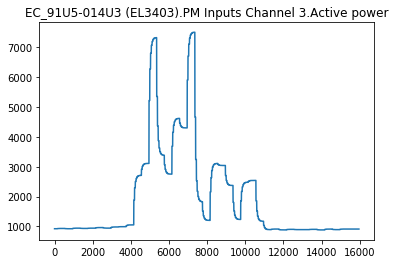

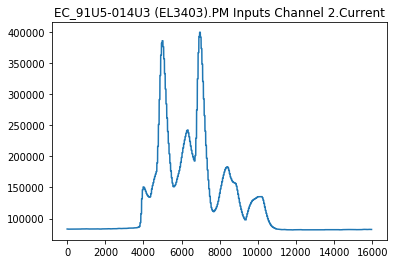

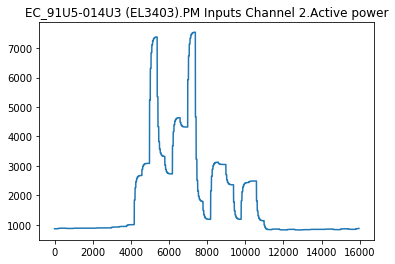

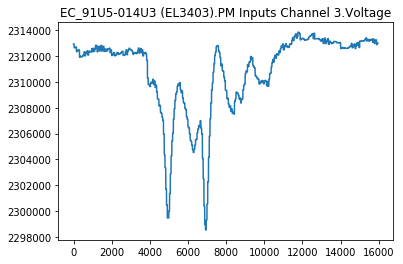

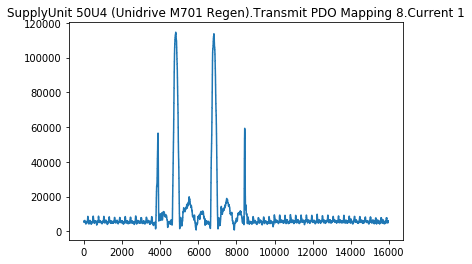

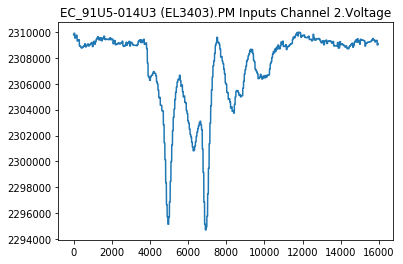

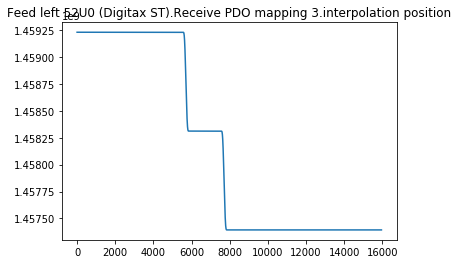

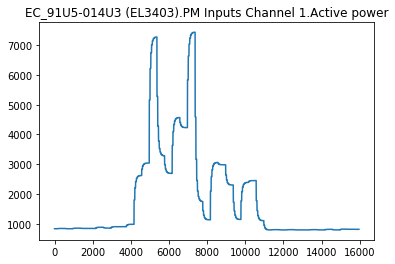

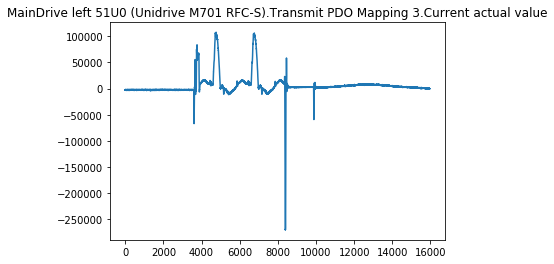

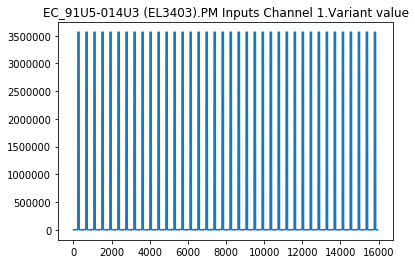

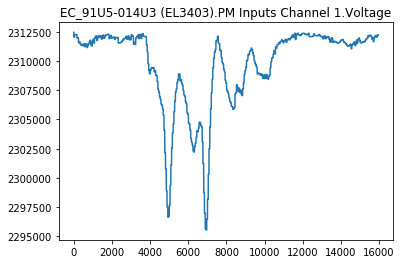

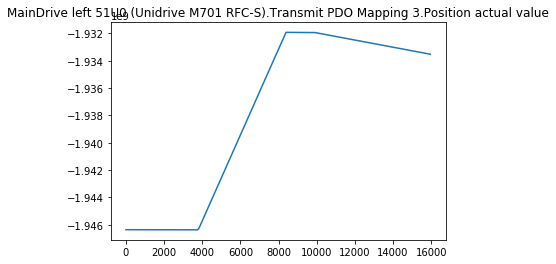

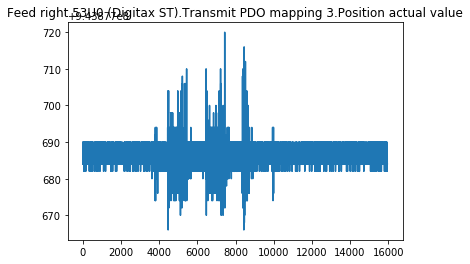

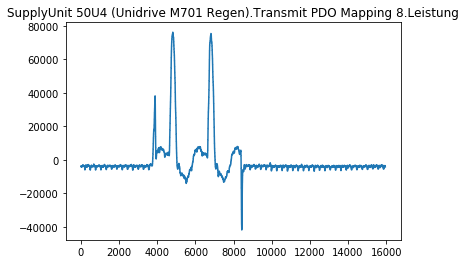

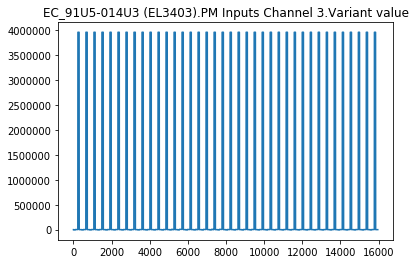

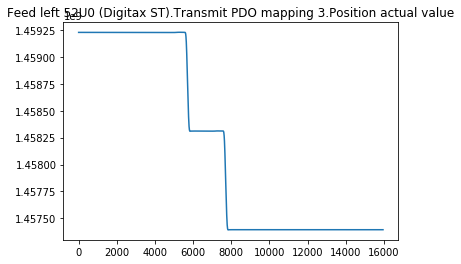

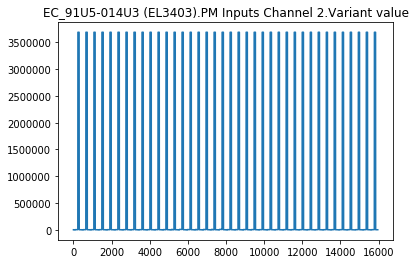

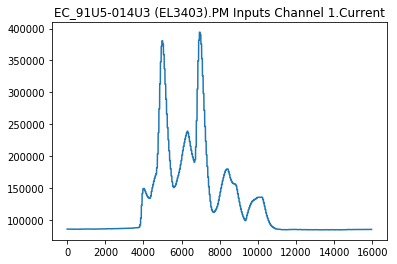

In [23]:
n = df_DINT.columns.size
for i in range(2,n):
   plt.subplots()
   df_DINT[df_DINT.columns[i]].plot(kind='line');
   plt.title(df_DINT.columns[i])
  

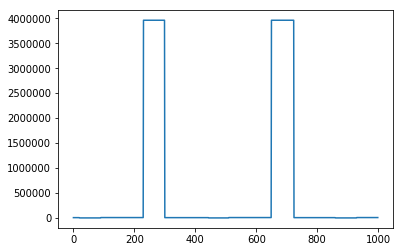

In [27]:
df_DINT['EC_91U5-014U3 (EL3403).PM Inputs Channel 3.Variant value'].head(1000).plot()


c:\users\xiaoli yang\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


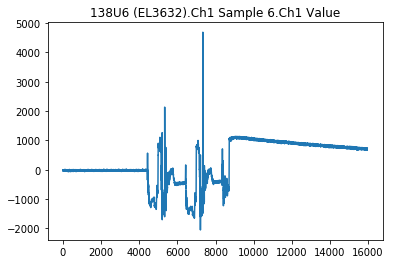

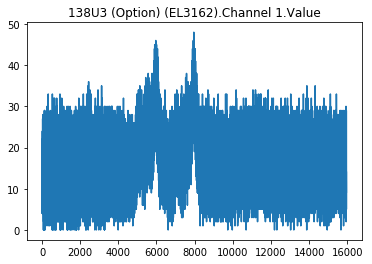

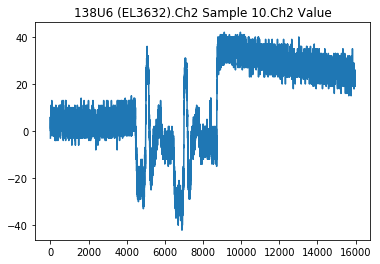

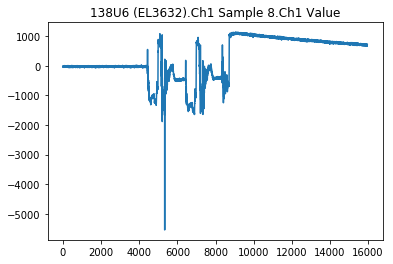

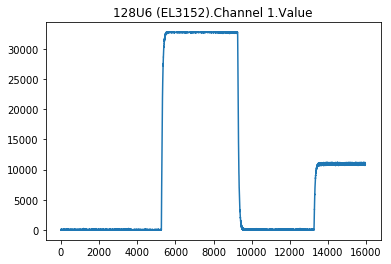

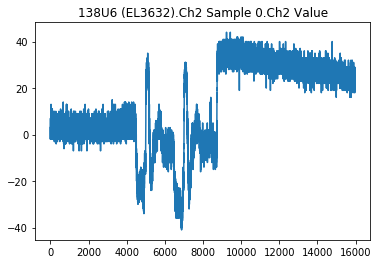

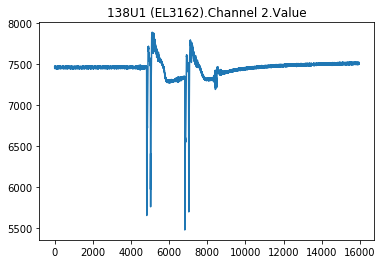

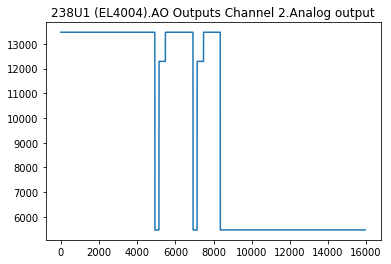

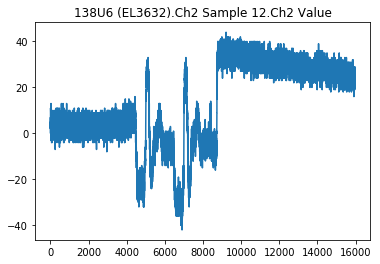

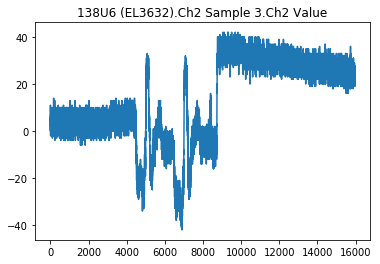

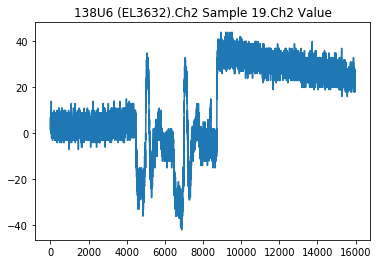

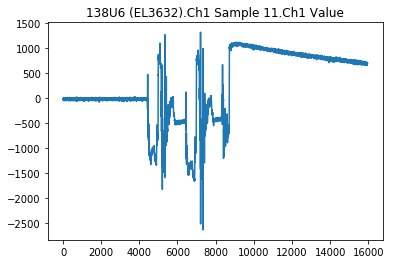

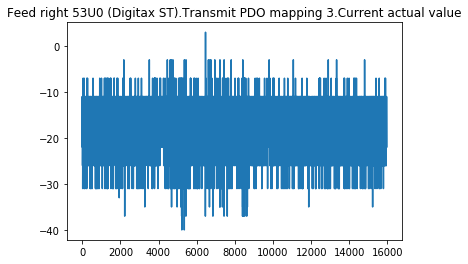

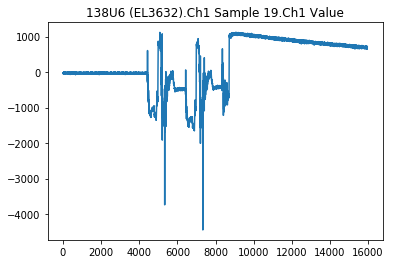

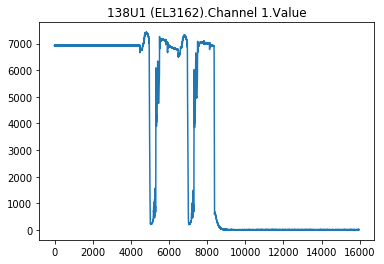

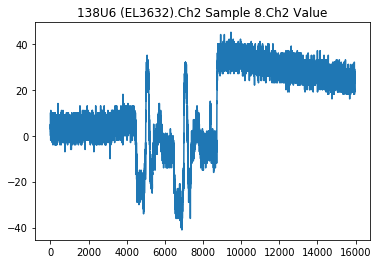

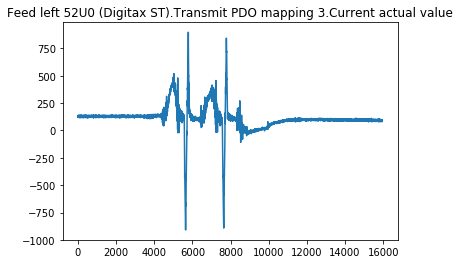

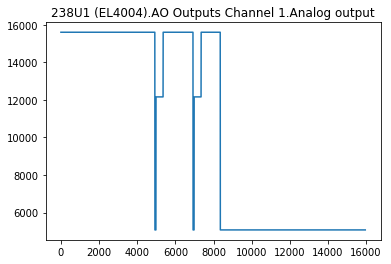

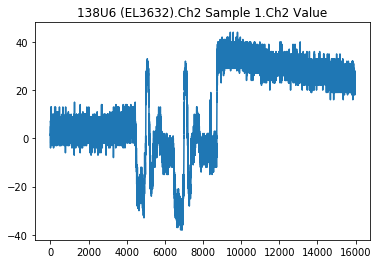

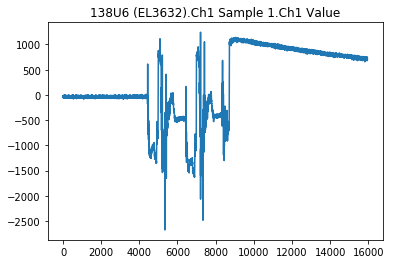

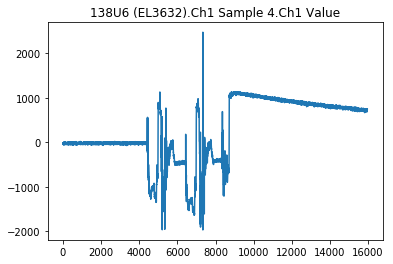

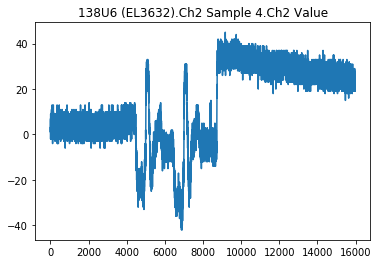

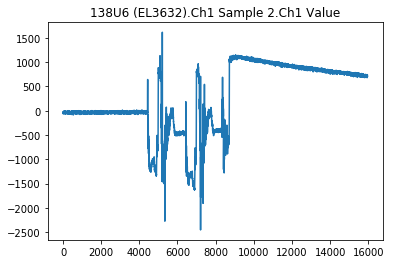

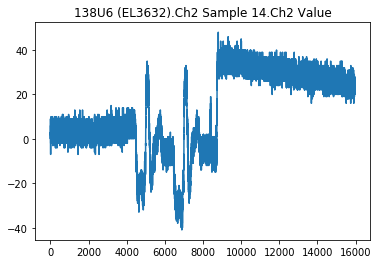

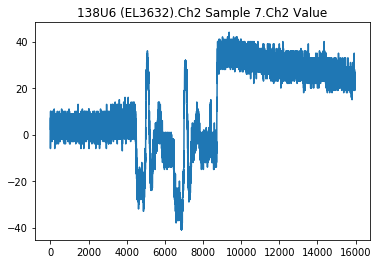

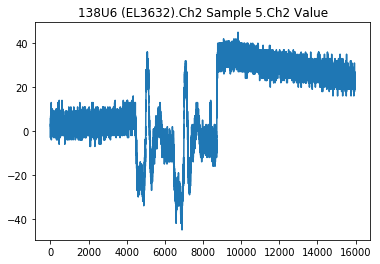

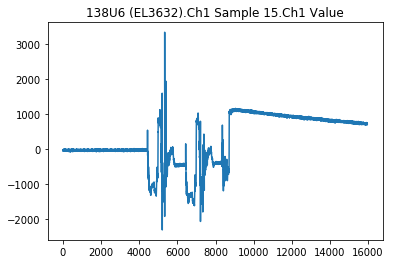

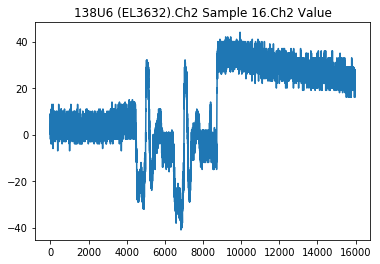

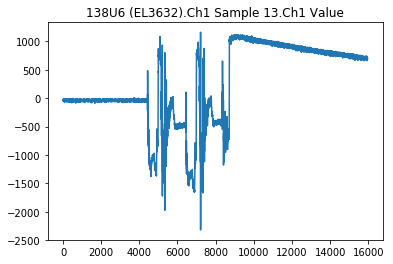

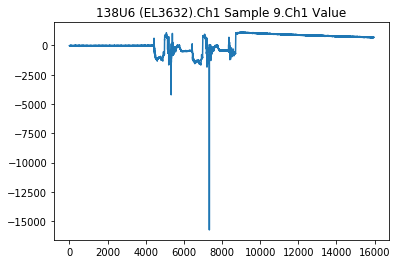

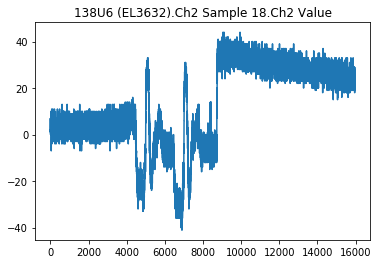

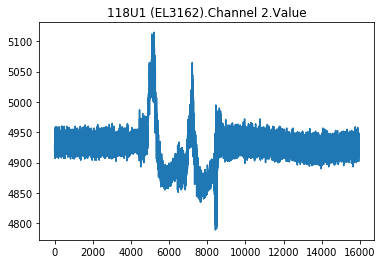

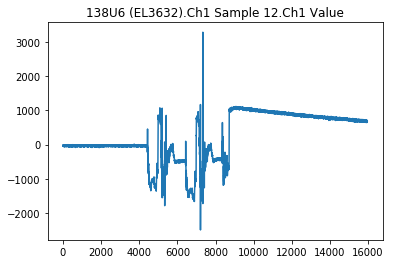

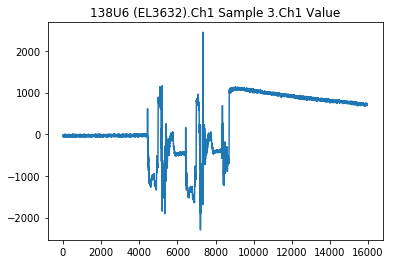

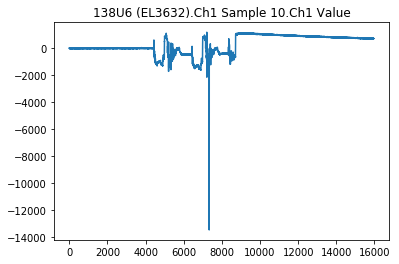

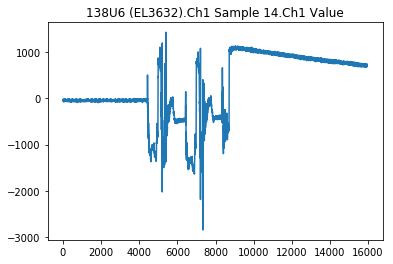

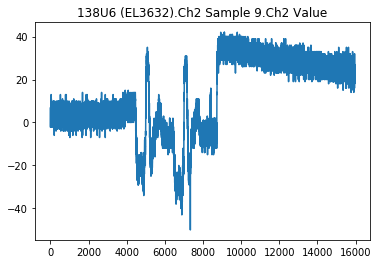

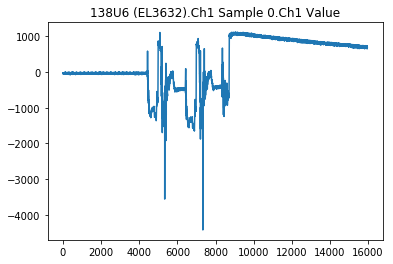

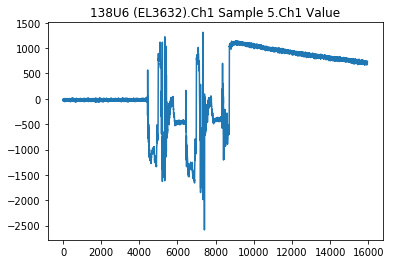

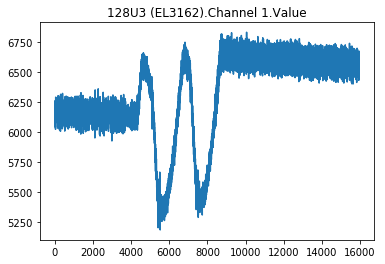

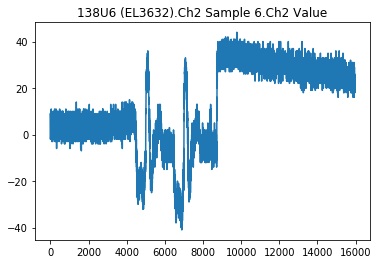

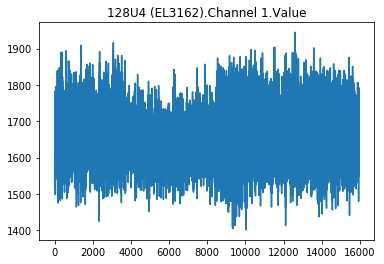

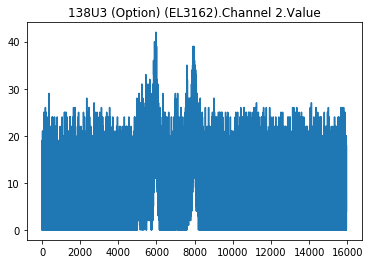

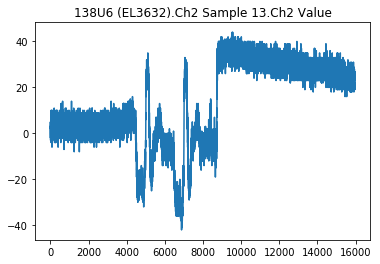

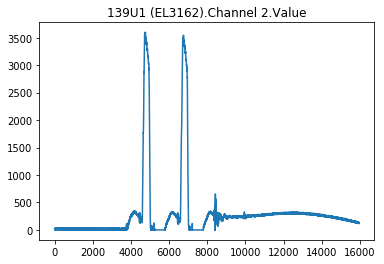

In [29]:
n = df_INT.columns.size
for i in range(2,n):
   plt.subplots()
   df_INT[df_INT.columns[i]].plot(kind='line');
   plt.title(df_INT.columns[i])
  